<a href="https://colab.research.google.com/github/tjdgus0226/seonghyun/blob/main/final_assignment_parkseonghyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##기본 설정, 패키지 실행

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

In [5]:
#한글 깨지는 걸 막기 위한 설정 #꼭 런타임 > 런타임 다시 시작 할 것!!! 이걸 해야 적용됨. 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,919 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [6]:
#한글 깨지는 걸 막기 위한 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기 및 전처리

**1. "health_data_age(df1)"**
 : 나이별(age)신장, 시력, 청력을 비교하기 위해서 데이터 프레임
- 파이썬으로 전처리를 진행하고 싶었으나, 아직 파이썬 실력의 부족으로 엑셀로 전처리하여 파일을 가져왔습니다.
1. 엑셀에서 VLOOKUP함수를 활용하여 연령대를 확인하기 위하여 연령대코드로 되어있는 항목을 연령대로 보여주었습니다. 

     (ex)코드가 9인경우 40~44세로 보여주기)
2. 엑셀의 피벗테이블을 활용하여 연령대를 그룹화하여 평균을 보여주었습니다. 


In [7]:
health_data_age = pd.read_excel("/content/drive/My Drive/아비혁/health_data_age.xlsx")
df1 = health_data_age
display(df1)

,행 레이블,평균 : 신장(5Cm단위),평균 : 시력(좌),평균 : 시력(우),평균 : 청력(좌),평균 : 청력(우)
0,40~44세,165.804783,1.074208,1.080478,1.007111,1.012928
1,45~49세,164.342586,1.002630,1.008546,1.016070,1.010226
2,50~54세,161.904894,0.987097,0.989488,1.020022,1.017798
3,55~59세,160.884513,0.959413,0.948598,1.043391,1.026702
4,60~64세,159.162321,0.888005,0.858996,1.050847,1.045632
5,65~69세,158.092486,0.826705,0.854913,1.065896,1.055491
6,70~74세,156.468481,0.758883,0.768625,1.124642,1.127507
7,75~79세,153.832891,0.712732,0.748276,1.159151,1.164456
8,80~84세,153.552124,0.735135,0.781081,1.254826,1.223938
9,85세+,151.909091,0.454545,0.674545,1.418182,1.345455


**2. "health_data_change(df2)"**
: AST, ALT, 감마지티피, 음주상태 등을 비교하며 문제를 풀 때 필요한 데이터 프레임
- 도출해내고 싶은 인사이트 중에서 AST/ALT 비율을 확인하고 싶은 게 있는데 이를 파이썬으로 어떻게 해야할지 몰라서 엑셀로 전처리 후 새로 만들었습니다.
- 문제를 풀때 AST,ALT 앞에 있는 ()괄호 때문에 오류가 뜬 경우가 있었습니다. 그렇기에 이 부분은 파이썬의 rename함수를 활용하여 제거하였습니다. 또한 AST/ALT 비율도 오류가 뜨기에 ratio로 이름을 바꿔주었습니다.

In [8]:
health_data_change = pd.read_csv("/content/drive/My Drive/아비혁/health_data_change.csv" , encoding='cp949')
health_data_change.rename(columns={'(혈청지오티)AST' : 'AST', '(혈청지오티)ALT' : 'ALT','AST/ALT' : 'ratio'},inplace = True)

display(health_data_change)
df2 = health_data_change
display(df2)

,기준년도,가입자일련번호,시도코드,시도명,성별코드,연령대코드(5세단위),연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,...,AST,ALT,ratio,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,세종특별자치시,M,9,40~44세,165,60,72.1,...,21.0,27.0,0.777778,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,대구광역시,F,13,60~64세,150,65,81.0,...,18.0,15.0,1.200000,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,서울특별시,F,12,55~59세,155,55,70.0,...,27.0,25.0,1.080000,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,울산광역시,M,13,60~64세,160,70,90.8,...,65.0,97.0,0.670103,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,경기도,F,12,55~59세,155,50,75.2,...,18.0,17.0,1.058824,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,충청남도,F,13,60~64세,155,55,83.0,...,20.0,21.0,NaN,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,충청북도,F,11,50~54세,160,55,77.5,...,24.0,22.0,NaN,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,전라북도,M,12,55~59세,160,80,93.0,...,22.0,27.0,NaN,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,대구광역시,F,15,70~74세,155,55,78.0,...,26.0,24.0,NaN,21.0,No,No,0,NaN,NaN,12/29/2021


,기준년도,가입자일련번호,시도코드,시도명,성별코드,연령대코드(5세단위),연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,...,AST,ALT,ratio,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,세종특별자치시,M,9,40~44세,165,60,72.1,...,21.0,27.0,0.777778,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,대구광역시,F,13,60~64세,150,65,81.0,...,18.0,15.0,1.200000,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,서울특별시,F,12,55~59세,155,55,70.0,...,27.0,25.0,1.080000,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,울산광역시,M,13,60~64세,160,70,90.8,...,65.0,97.0,0.670103,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,경기도,F,12,55~59세,155,50,75.2,...,18.0,17.0,1.058824,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,충청남도,F,13,60~64세,155,55,83.0,...,20.0,21.0,NaN,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,충청북도,F,11,50~54세,160,55,77.5,...,24.0,22.0,NaN,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,전라북도,M,12,55~59세,160,80,93.0,...,22.0,27.0,NaN,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,대구광역시,F,15,70~74세,155,55,78.0,...,26.0,24.0,NaN,21.0,No,No,0,NaN,NaN,12/29/2021


# 1) 시각화1:  나이별(age)신장, 시력, 청력을 비교


In [9]:
import pandas as pd 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)


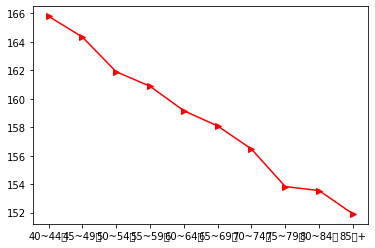

In [10]:
#1 신장 변화
x_height = df1['행 레이블']
y_height = df1['평균 : 신장(5Cm단위)']
plt.plot(x_height,y_height, marker=">",  color='red')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)


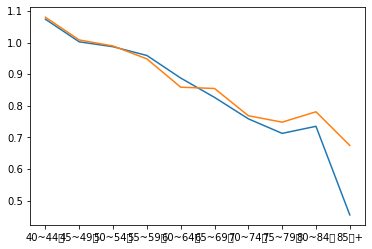

In [11]:
#2 시력 변화
x_sight = health_data_age['행 레이블']
y_sight_1 = health_data_age['평균 : 시력(좌)'] #파란선
y_sight_2 = health_data_age['평균 : 시력(우)'] #주황선
plt.plot(x_sight,y_sight_1)
plt.plot(x_sight,y_sight_2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)


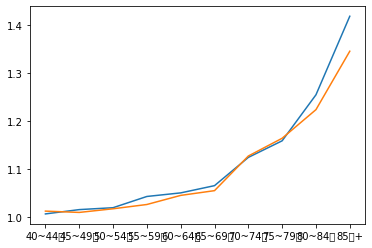

In [12]:
#3. 청력 변화
x_hearing = health_data_age['행 레이블']
y_hearing_1 = health_data_age['평균 : 청력(좌)']
y_hearing_2 = health_data_age['평균 : 청력(우)']
plt.plot(x_hearing,y_hearing_1)
plt.plot(x_hearing,y_hearing_2)

**시각화1 결과**

- 시각화 선정이유: 사람들은 나이가 들 수록 키가 줄어들고, 시력과 청력이 나빠진다고 생각합니다. 과연 이 가정이 사실인지 알아보기 위 시각화를 하였습니다. 
1. 신장 변화: 연령대별로 알아보기 위해 라인 그래프를 활용하였습니다. 40~44세 사이의 평균키가 166정도로 가장 크고 85세 이상이 152정도로 가장 작습니다. 나이가 들수록 키가 꾸준히 줄어듦을 볼  수 있습니다. 
2. 시력 변화: 좌, 우 시력을 함께 비교하는 라인 그래프를 활용하였습니다. 시력(좌)는 파란선, 시력(우)는 주황선으로 표시하였습니다. 시각화 결과 좌, 우, 시력이 모두 나이가 듦에 따라 안 좋아지는 것을 알 수 있고, 특히 80세 이상부터는 좌 시력이 극단적으로 안 좋아졌음을 알 수 있습니다. 
3. 청력 변화: 좌, 우 청력을 함께 비교하는 라인 그래프를 활용하였습니다.그래프의 숫자만보면 나이가 듦에 따라 청력이 좋아지는 것 처럼 보입니다. 하지만, 데이터 설명을 보면, 정상은 1, 질환의심은 2, 측정 불가는 3으로 나타냅니다. 그렇기에 숫자가 1에 가까운 40대일수록 정상임을 알 수 있고, 80세가 넘을수록 측정불가 비중과 질환의심 비중이 높아짐을 볼 수 있습니다.  

# 2)시각화2: AST, ALT, AST/ALT 비율을 비교하여 음주여부에 따른 변화 비교

,음주여부,AST
0,No,26.731678
1,Yes,28.199173


<BarContainer object of 2 artists>

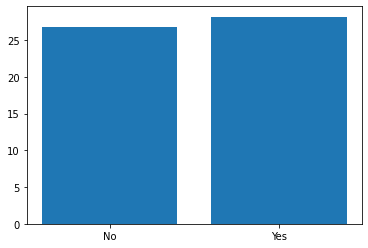

In [13]:
ast_mean = df2.groupby(['음주여부'])['AST'].mean().reset_index()
display(ast_mean)
plt.bar(ast_mean['음주여부'],ast_mean['AST'])

In [14]:
#그래프를 그리기위해 추가로 패키지를 설치하였습니다. 
import plotly.offline as pyo
import plotly.graph_objs as go

In [15]:
df2_AST =df2.groupby(['음주여부','연령대'])['AST'].mean().reset_index()

trace1 = go.Bar(x = df2_AST[df2_AST['음주여부']=='Yes'].연령대,y=df2_AST[df2_AST['음주여부']=='Yes'].AST, name = 'Yes')
trace2 = go.Bar(x = df2_AST[df2_AST['음주여부']=='No'].연령대,y=df2_AST[df2_AST['음주여부']=='No'].AST, name = 'No')

data = [trace1, trace2]
layout = go.Layout(title='연령별 AST 평균')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

,음주여부,ALT
0,No,24.851960
1,Yes,28.163853


<BarContainer object of 2 artists>

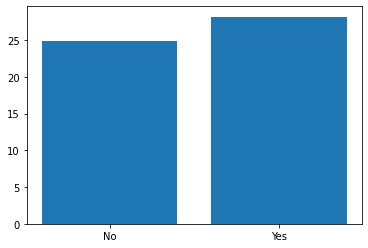

In [16]:
alt_mean = df2.groupby(['음주여부'])['ALT'].mean().reset_index()
display(alt_mean)
plt.bar(alt_mean['음주여부'],alt_mean['ALT'])

In [17]:
df2_ALT =df2.groupby(['음주여부','연령대'])['ALT'].mean().reset_index()

trace1 = go.Bar(x = df2_ALT[df2_ALT['음주여부']=='Yes'].연령대,y=df2_ALT[df2_ALT['음주여부']=='Yes'].ALT, name = 'Yes')
trace2 = go.Bar(x = df2_ALT[df2_ALT['음주여부']=='No'].연령대,y=df2_ALT[df2_ALT['음주여부']=='No'].ALT, name = 'No')

data = [trace1, trace2]
layout = go.Layout(title='연령별 ALT 평균')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [18]:
df2_ratio =df2.groupby(['음주여부','연령대'])['ratio'].mean().reset_index()
df2_ratio.dropna()

,음주여부,연령대,ratio
0,No,40~44세,1.110093
1,No,45~49세,1.237226
2,No,50~54세,1.219337
3,No,55~59세,1.346514
4,No,60~64세,1.211961
5,No,65~69세,1.312272
6,No,70~74세,1.343662
7,No,75~79세,1.394144
8,No,80~84세,1.237374
10,Yes,40~44세,1.106686


In [19]:
df2_ratio = df2.groupby(['음주여부','연령대'])['ratio'].mean().reset_index()
df2_ratio = df2_ratio.dropna()

trace1 = go.Bar(x = df2_ratio[df2_ratio['음주여부']=='Yes'].연령대,y=df2_ratio[df2_ratio['음주여부']=='Yes'].ratio, name = 'Yes')
trace2 = go.Bar(x = df2_ratio[df2_ratio['음주여부']=='No'].연령대,y=df2_ratio[df2_ratio['음주여부']=='No'].ratio, name = 'No')

data = [trace1, trace2]
layout = go.Layout(title='연령별 AST/ALT 비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

음주는 간에 무리를 주고, 간 기능을 저하시킵니다. 이러한 음주가 AST, ALT에 어떤 영향을 주고, 더 나아가 AST/ALT이 어떻게 달라지는지 확인하기 위해 막대 그래프를 그려 확인해봤습니다. 
AST는 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가합니다. 막대그래프를 보면, 음주를 할 경우가 아닌 경우에 비해 약 2% 더 높은 것을 알 수 있습니다. 
하지만 이를 봤을 때는 딱히 큰 차이가 보이지 않아 추가적으로 연령대를 나눠 음주 YES,NO에 따른 AST 평균을 비교해보았습니다. 그 결과 65-69세의경우는 음주여부에 따른 AST 평균이 비슷했지만, 70~74세의 경우는 4%나 차이남을 보여주었습니다. 이 부분에 대해 더 분석해 보면 좋을 것 같습니다. 

ALT는 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가합니다. 막대그래프를 보면, 음주를 할 경우가 아닌 경우에 비해 약 4% 더 높은 것을 알 수 있습니다. ALT도 추가적으로 분석한 결과, AST와는 다른 결과가 나왔습니다. 음주를 하는 사람들의 AST 평균은 70-74세까지는 증가하였지만 이후부터는 감소하는 추세를 보였습니다. 하지만 음주를 하는 사람들의 ALT 평균은 꾸준히 감소하는 모습을 볼 수 있습니다. 특히 40~44세때는 29%였는데, 85세이상은 17%까지 떨어지며 큰 차이를 보였습니다. 이 부분에 대해 왜 유독 ALT의 평균이 나이가 듦에 따라 떨어지는지 추가적인 분석이 있음 좋을 것 같습니다. 

또한, AST와 ALT를 조사해본 결과 알코올성 간 질환을 AST/ALT 비율로 구할 수 있음을 발견한 후 연령대별 AST/ALT 비율을 구해보았습니다. 이때 nan이 있음 값이 나오지 않기에 nan을 제거하였습니다. 
AST/ALT 비율이 1미만일 경우 알코올성 간 질환이 없음, AST/ALT이 1이상이면 알코올성 간 질환이 있음, 그리고 AST/ALT이 1.5이상일 경우 알코올에 의한 중증 간 손상이 있음을 보여줍니다. 
그래프를 보면, 45세-49세에서 음주하는 사람들의 비율을 제외하고는 모두 비율이 1.0이 넘어 알코올성 간 질환이 있음을 알 수 있습니다. 특히 80~84세는 AST/ALT비율이 1.5로 중증 간 손상이 있음이 드러남으로써 지나친 음주는 나이가 많이 들어서 부정적인 영향을 보여준다는 결론을 내릴 수 있습니다. 하지만, 음주를 안했음에도 비율이 높게 나타나는 사람들은 신체의 어떤 부분에서 부정적인 영향을 불러일으켜 이러한 결과가 나타났는지 추가적인 분석이 들어가도 좋을 것 같습니다.  


# 3) 시각화3: 성별에 따른 감마지티피 수치 분석

In [20]:
#기존 데이터프레임에서 male만 추출하기
male = (df2.성별코드 == 'M') 
df2_male = df2.loc[male, :]
display(df2_male)

,기준년도,가입자일련번호,시도코드,시도명,성별코드,연령대코드(5세단위),연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,...,AST,ALT,ratio,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,세종특별자치시,M,9,40~44세,165,60,72.1,...,21.0,27.0,0.777778,21.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,울산광역시,M,13,60~64세,160,70,90.8,...,65.0,97.0,0.670103,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,6,27,대구광역시,M,9,40~44세,185,85,94.0,...,25.0,32.0,0.781250,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,충청남도,M,9,40~44세,165,80,93.0,...,18.0,20.0,0.900000,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,경기도,M,13,60~64세,160,65,92.0,...,18.0,17.0,1.058824,19.0,Yes,No,1,0.0,2.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2020,9992,11,서울특별시,M,16,75~79세,155,45,70.0,...,20.0,13.0,NaN,16.0,No,No,0,NaN,NaN,12/29/2021
9992,2020,9993,26,부산광역시,M,15,70~74세,170,70,88.0,...,23.0,17.0,NaN,36.0,No,Yes,0,NaN,NaN,12/29/2021
9993,2020,9994,30,대전광역시,M,12,55~59세,165,55,81.7,...,25.0,30.0,NaN,72.0,No,Yes,0,NaN,NaN,12/29/2021
9994,2020,9995,41,경기도,M,17,80~84세,150,55,95.0,...,22.0,21.0,NaN,18.0,No,No,0,NaN,NaN,12/29/2021


In [21]:
#남성 감마지티피 수치의 low, average, high 구하기
print(len(df2_male.loc[df2_male['감마지티피']<11]))
print(len(df2_male.loc[(df2_male['감마지티피']>=11) & (df2_male['감마지티피'] <= 65)]))
print(len(df2_male.loc[df2_male['감마지티피']>65]))
#각각 47, 4138, 919 가 나옴

47
4138
919


In [22]:
#기존 데이터프레임에서 female만 추출하기
female = (df2.성별코드 == 'F') 
df2_female = df2.loc[female, :]
display(df2_female)

,기준년도,가입자일련번호,시도코드,시도명,성별코드,연령대코드(5세단위),연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,...,AST,ALT,ratio,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
1,2020,2,27,대구광역시,F,13,60~64세,150,65,81.0,...,18.0,15.0,1.200000,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,서울특별시,F,12,55~59세,155,55,70.0,...,27.0,25.0,1.080000,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,5,41,경기도,F,12,55~59세,155,50,75.2,...,18.0,17.0,1.058824,14.0,No,No,0,NaN,NaN,12/29/2021
8,2020,9,41,경기도,F,17,80~84세,150,50,82.0,...,42.0,48.0,0.875000,39.0,No,No,0,NaN,NaN,12/29/2021
9,2020,10,48,경상남도,F,14,65~69세,150,45,71.2,...,22.0,11.0,2.000000,10.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2020,9990,41,경기도,F,16,75~79세,145,70,94.0,...,19.0,15.0,NaN,11.0,No,No,0,NaN,NaN,12/29/2021
9995,2020,9996,44,충청남도,F,13,60~64세,155,55,83.0,...,20.0,21.0,NaN,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,충청북도,F,11,50~54세,160,55,77.5,...,24.0,22.0,NaN,21.0,No,Yes,1,0.0,0.0,12/29/2021
9998,2020,9999,27,대구광역시,F,15,70~74세,155,55,78.0,...,26.0,24.0,NaN,21.0,No,No,0,NaN,NaN,12/29/2021


In [23]:
#여성 감마지티피 수치의 low, average, high 구하기
print(len(df2_female.loc[df2_female['감마지티피']<8]))
print(len(df2_male.loc[(df2_male['감마지티피']>=8) & (df2_male['감마지티피'] <= 35)]))
print(len(df2_male.loc[df2_male['감마지티피']>35]))
#각각 56, 2840, 2258 나옴

56
2840
2258


In [24]:
#count라는 새로운 데이터프레임을 만들기
import pandas as pd
count = pd.DataFrame({'감마지티피': ['low','average','high'],
                              'Male': [47,4138,919],
                              'Female':[56,2840,2258]})
display(count)

,감마지티피,Male,Female
0,low,47,56
1,average,4138,2840
2,high,919,2258


([<matplotlib.patches.Wedge at 0x7f66ae2e5750>,
 [Text(1.0995397364939268, 0.031817728876618094, ''),
  Text(-0.9453239366214546, 0.5624612474211146, ''),
  Text(0.9286590445981888, -0.589569655669268, '')],
 [Text(0.5997489471785055, 0.017355124841791688, '0.9%'),
  Text(-0.5156312381571571, 0.3067970440478806, '81.1%'),
  Text(0.5065412970535575, -0.32158344854687343, '18.0%')])

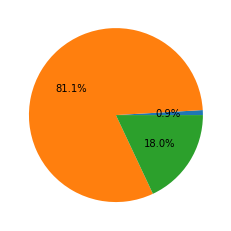

In [25]:
plt.pie(count['Male'], autopct = '%.1f%%')

([<matplotlib.patches.Wedge at 0x7f66ae31ce50>,
 [Text(1.0993592221308353, 0.037540654174970704, ''),
  Text(-0.24925325591509626, 1.071388265016807, ''),
  Text(0.21254381869330624, -1.0792706449891367, '')],
 [Text(0.5996504847986374, 0.020476720459074928, '1.1%'),
  Text(-0.1359563214082343, 0.5843935991000765, '55.1%'),
  Text(0.11593299201453067, -0.5886930790849836, '43.8%')])

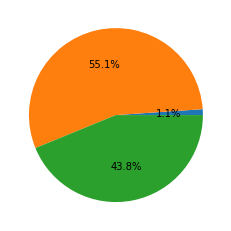

In [26]:
plt.pie(count['Female'], autopct = '%.1f%%')

위 그래프에서 AST와 ALT를 비교하며 음주여부에 따른 변화량을 확인해보았습니다. 이 흐름에 이어 감마지티피의 수치 또한 확인해보았습니다. 감마지티피 수치가 실은 AST와 ALT보다 더 의미있는데 그 이유는 감마지티피 수치가 높아졌을 때 담석, 활달, 담관염 등의 이상이 생기거나 간손상이 되었을 가능성이 크기 때문입니다. 이번 분석에서는 원형 그래프를 만들어, 성별에 따른 감마지티피 수치가 낮은지(low), 평균인지(average), 높은지(high) 파악해보겠습니다. 남성의 경우 11-63IU/L, 여성의 경우 8-35IU/L일 때 정상이고, 이보다 낮으면 낮은 수치, 높으면 높은 수치를 보여줍니다. 
수치를 비교하기 위해서 남성,여성을 따로 구하고, 나온 수치를 바탕으로 새로운 데이터 프레임을 만들었습니다. Low는 파란색, average는 주황색, high는 초록색으로 표시하였습니다. 
원형그래프를 그려 분석한 결과 남성과 여성은 뚜렷한 차이를 보였습니다. 남성의 경우는 정상의 비중이 81%으로 다른 비중에 비해 압도적으로 높게 드러났습니다. 하지만 여성의 경우 정상의 비중이 50%이지만, 높은 비중 또한 43%나 차지합니다. 이 분석을 통해 여성의 감마지티피 수치는 정상과 높음이 많기에 이 수치에 대해 유의해야하고 검사가 필요함이 드러났습니다. 
